In [ ]:
# MQTT Protocol testing on IoT.

In [1]:
%pip install paho-mqtt

  Using cached paho_mqtt-1.6.1-py3-none-any.whl
You should consider upgrading via the '/root/python/mqtt_client/test-venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
#%%writefile mqtt_client.py
from datetime import datetime

import paho.mqtt.client as mqtt
import dataset


def on_connect_callback(client, userdata, flags, rc):
    if rc == 0: # ok
        print('Connection OK')
        # topic = '#' # The whole tree
        topic = 'esp32/+/sensors/#'
        client.subscribe(topic)
        client.message_callback_add(topic, on_message_callback) # call to fuinction later
    else:
        print('Connection fail')
    
def on_message_callback(client, userdata, msg):
    print(msg.topic, msg.payload)
    topic = msg.topic.split('/')[-1]
    payload = float(msg.payload)

    # Database
    db = dataset.connect('sqlite:///sensors.sqlite')
    table = db[topic] # create db table
    table.insert({'timestamp': datetime.now(), 'value': payload})
    db.close()


client = mqtt.Client()
client.on_connect = on_connect_callback
client.username_pw_set('cfreire', '65Zc2E')
client.connect('iot.cfreire.pt')
client.loop_forever()

Connection OK
esp32/84:F7:03:C4:04:C0/sensors/humidity b'68.60'


OperationalError: (sqlite3.OperationalError) disk I/O error
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [11]:
%pip install dataset

     |████████████████████████████████| 230 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 657 kB 16.3 MB/s eta 0:00:01
  Using cached MarkupSafe-2.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
You should consider upgrading via the '/root/python/mqtt_client/test-venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Working with databases

In [ ]:
import dataset

db = dataset.connect('sqlite:///:memory:')

table = db['Humidity']
table.insert(dict(name='John Doe', age=37))
table.insert(dict(name='Jane Doe', age=34, gender='female'))

john = table.find_one(name='John Doe')
dict(john)
print(john)

## PLOT data

In [6]:
%pip install matplotlib

     |████████████████████████████████| 11.6 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 34.6 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 310 kB 37.5 MB/s eta 0:00:01
You should consider upgrading via the '/root/python/mqtt_client/test-venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


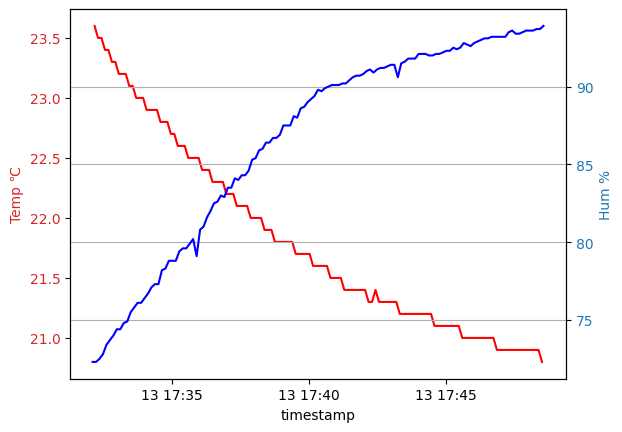

KeyboardInterrupt: 

In [37]:
import time
import dataset 
from matplotlib import pyplot as plt
from IPython.display import clear_output

while True:
    db = dataset.connect('sqlite:///sensors.sqlite')
    ttemp = db['temperature']
    thumi = db['humidity']
    temp = [(row['timestamp'], row['value']) for row in ttemp.all()]
    humid = [(row['timestamp'], row['value']) for row in thumi.all()]
    db.close()

    # print(data)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('timestamp')
    ax1.set_ylabel('Temp \u2103', color=color)
    ax1.plot(*zip(*temp),'r')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Hum %', color=color)
    ax2.plot(*zip(*humid),'b')
    ax2.tick_params(axis='y', labelcolor=color)

    #plt.figure(figsize=(12,4))
    #plt.plot(*zip(*temp),'r', *zip(*humid),'b' )
    #plt.title('Temperature & Humidity')
    #plt.ylabel('\u2103')
    plt.grid()
    plt.show()
    time.sleep(6)
    clear_output()


In [29]:
db.close()

AttributeError: 'NoneType' object has no attribute 'dispose'

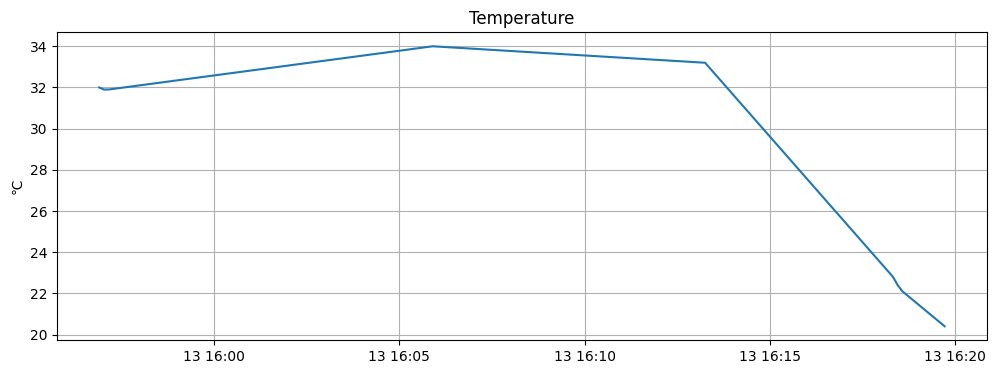

In [15]:
x = []
y = []
for row in data:
    x.append(row[0])
    y.append(row[1])

plt.figure(figsize=(12,4))
plt.plot(x,y)
plt.title('Temperature')
plt.ylabel('\u2103')
plt.grid()
plt.show()

## Plot MQTT Temperature graphic

In [10]:
a = ['a', 'b', 'c']
print(*a)
print(*zip(a))

a b c
('a',) ('b',) ('c',)
